In [61]:
import matplotlib.pyplot as plt

from transformers import GPT2LMHeadModel, pipeline, set_seed

In [9]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')
sd_hf = model_hf.state_dict()

for parameter_name, parameter_tensor in sd_hf.items():
    print(f'{parameter_name:<40s} {parameter_tensor.shape}')

transformer.wte.weight                   torch.Size([50257, 768])
transformer.wpe.weight                   torch.Size([1024, 768])
transformer.h.0.ln_1.weight              torch.Size([768])
transformer.h.0.ln_1.bias                torch.Size([768])
transformer.h.0.attn.c_attn.weight       torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias         torch.Size([2304])
transformer.h.0.attn.c_proj.weight       torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias         torch.Size([768])
transformer.h.0.ln_2.weight              torch.Size([768])
transformer.h.0.ln_2.bias                torch.Size([768])
transformer.h.0.mlp.c_fc.weight          torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias            torch.Size([3072])
transformer.h.0.mlp.c_proj.weight        torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias          torch.Size([768])
transformer.h.1.ln_1.weight              torch.Size([768])
transformer.h.1.ln_1.bias                torch.Size([768])
transformer.h.1.at

In [11]:
print('Example token embedding weights:')
print(sd_hf['transformer.wte.weight'].view(-1)[:20])

Example token embedding weights:
tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074, -0.1811, -0.0672,  0.0739, -0.0161,  0.0117,  0.1245,
        -0.0020, -0.0815,  0.0338,  0.2365])


In [18]:
print('Example position embedding weights:')
print(sd_hf['transformer.wpe.weight'].view(-1)[:20])

Example position embedding weights:
tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])


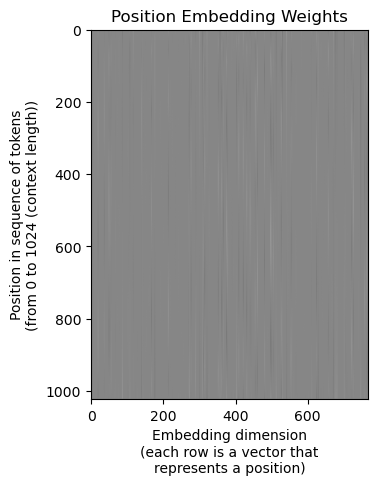

In [26]:
plt.imshow(sd_hf['transformer.wpe.weight'], cmap='gray')
plt.title('Position Embedding Weights')
plt.xlabel('Embedding dimension\n(each row is a vector that\nrepresents a position)')
plt.ylabel('Position in sequence of tokens\n(from 0 to 1024 (context length))')
plt.show()

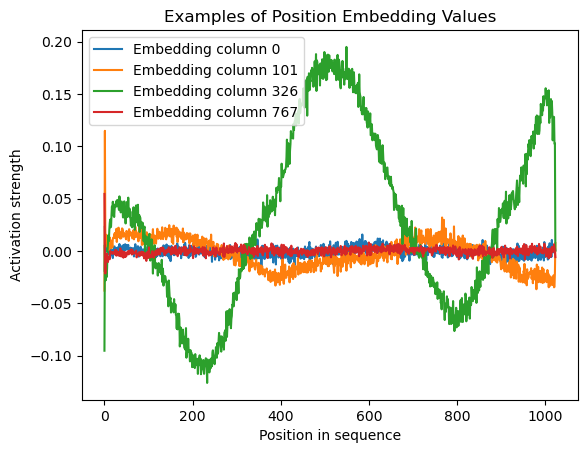

In [54]:
plt.figure()
for col in [0, 101, 326, 767]:
    plt.plot(sd_hf['transformer.wpe.weight'][:, col], label=f'Embedding column {col}')
plt.title('Examples of Position Embedding Values')
plt.xlabel('Position in sequence')
plt.ylabel('Activation strength')
plt.legend()
plt.show()

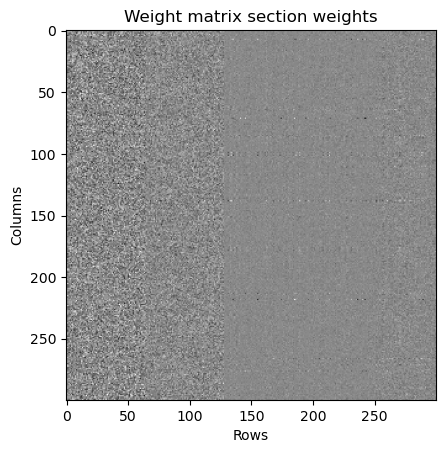

In [60]:
plt.imshow(sd_hf['transformer.h.1.attn.c_attn.weight'][:300, :300], cmap='gray')
plt.title('Weight matrix section weights')
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.show()

In [62]:
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Hello, I'm a language model, so I can write things that are easy to understand with a little bit of code. But when you think of words, it's hard to think of words that are as simple as a little word in a sentence.\n\nSo I'm going to use a little bit of code, and I'll talk a little bit about the syntax.\n\nThis is how you write your first line:\n\n$trans = new $trans [1, 2, 3, 4]; $trans -> write ( 'Hello, I'm a language model, so I can write things that are easier to understand with a little bit of code.' );\n\nThis code is pretty simple, but it really doesn't have to be. We want to write this code in a few lines, and we're going to use an expression, which is a collection of $trans. We'll use the following syntax:\n\n$trans = new $trans [1, 2, 3, 4];\n\nNow what we're going to do is we're going to look for a line that begins with a semicolon, and then uses the word 'hello' in place of a semicolon. We'll also use the following code to write a couple of lines of cod